In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
e_int = "convergence_e_integration.out"
no_T_int = "convergence_no_T_integration.out"
T_frozen_int = "convergence_T_integration_frozen.out"

We'll ignore the first column.  The row values are:

In [6]:
e_data = np.genfromtxt(e_int)[:,1:]
no_T_data = np.genfromtxt(no_T_int)[:,1:]
T_frozen_data = np.genfromtxt(T_frozen_int)[:,1:]

In [7]:
# get an index
varnames = []
with open(e_int) as f:
    for line in f:
        varnames.append(line.split()[0])

In [8]:
varnames

['density',
 'xmom',
 'ymom',
 'rho_E',
 'rho_e',
 'Temp',
 'rho_He4',
 'rho_C12',
 'rho_O16',
 'rho_Fe56']

In [9]:
res = np.array([64, 128, 256, 512])

In [10]:
def plot_one(axx, idx, title):
    axx.plot(res, [no_T_data[idx,0], no_T_data[idx,2], no_T_data[idx,4], no_T_data[idx,6]], marker="x", label="no T integration")
    axx.plot(res, [T_frozen_data[idx,0], T_frozen_data[idx,2], T_frozen_data[idx,4], T_frozen_data[idx,6]], marker="x", label="T + frozen integration")
    axx.plot(res, [e_data[idx,0], e_data[idx,2], e_data[idx,4], e_data[idx,6]], marker="x", label="e integration")
    err0 = no_T_data[idx,0]
    axx.plot(res, err0*(res[0]/res), color="0.5", linestyle=":")
    axx.plot(res, err0*(res[0]/res)**2, color="0.5", linestyle=":")
    axx.set_title(title)
    axx.set_xscale("log")
    ax.set_yscale("log")

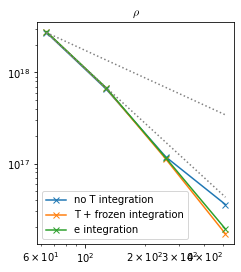

In [12]:
fig = plt.figure()
fig.set_size_inches((12, 9))
ax = fig.add_subplot(231)

idx = varnames.index("density")

plot_one(ax, idx, r"$\rho$")
ax.legend()

In [13]:
ax = fig.add_subplot(232)

idx = varnames.index("rho_e")
plot_one(ax, idx, r"$\rho e$")

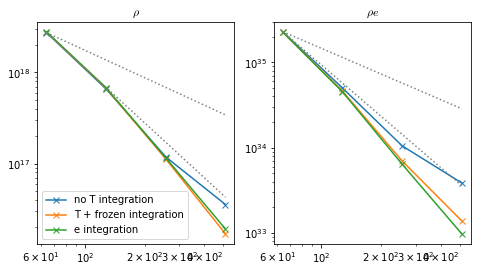

In [14]:
fig

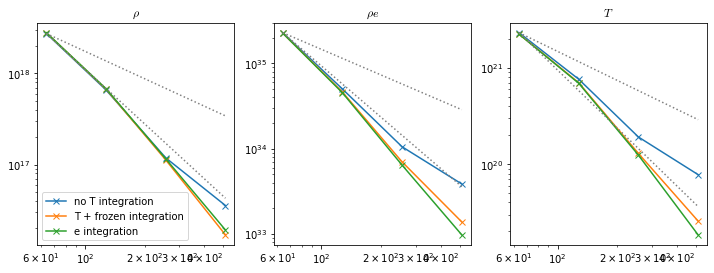

In [15]:
ax = fig.add_subplot(233)

idx = varnames.index("Temp")
plot_one(ax, idx, r"$T$")
fig

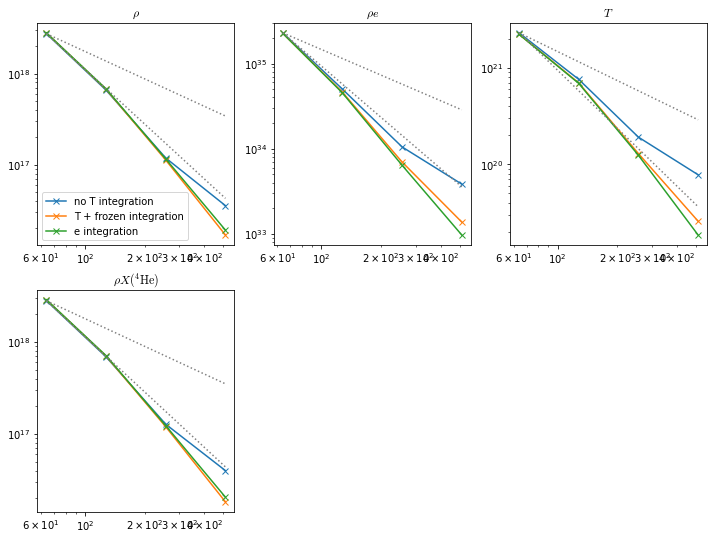

In [16]:
ax = fig.add_subplot(234)

idx = varnames.index("rho_He4")
plot_one(ax, idx, r"$\rho X({}^4\mathrm{He})$")
fig

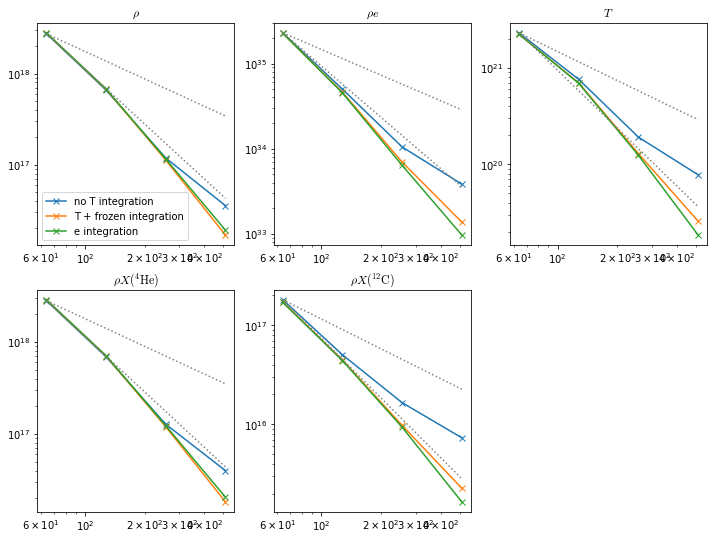

In [17]:
ax = fig.add_subplot(235)

idx = varnames.index("rho_C12")
plot_one(ax, idx, r"$\rho X({}^{12}\mathrm{C})$")
fig

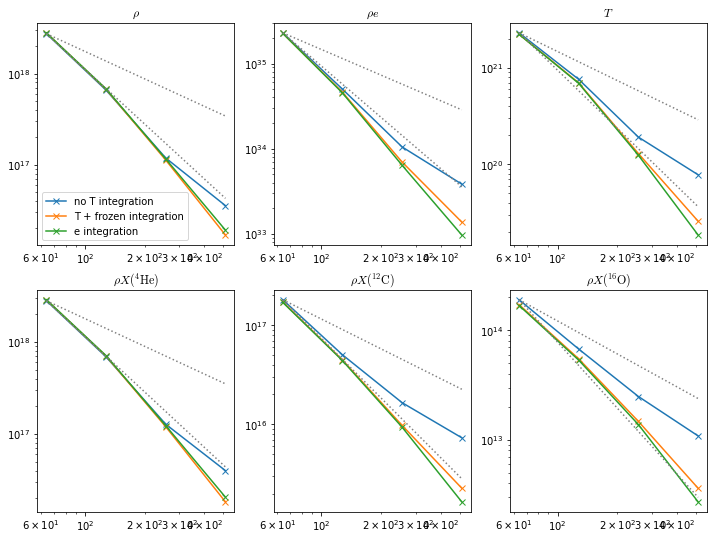

In [18]:
ax = fig.add_subplot(236)

idx = varnames.index("rho_O16")
plot_one(ax, idx, r"$\rho X({}^{16}\mathrm{O})$")
fig

In [19]:
fig.tight_layout()

In [20]:
fig.savefig("test.png", dpi=120, facecolor="white")